In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import seaborn as sns
sns.set(style="ticks")


pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
sns.set(style="ticks")
%matplotlib inline


import seaborn as sns
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)
pd.set_option('max_rows',100)
sns.set_context('poster')

In [76]:
df = pd.read_csv('health_median_income_data.csv')
print(df.shape)
df.head()


(3145, 23)


,FIPS,Population,% Diabetic,# HIV Cases,Infant Mortality Rate,Child Mortality Rate,% Food Insecure,% Limited Access,Household Income,Physically Unhealthy Days,Mentally Unhealthy Days,% LBW,% Smokers,% Obese,Food Environment Index,% Physically Inactive,% With Access,% Excessive Drinking,Chlamydia Rate,Teen Birth Rate,PCP Ratio,Dentist Ratio,MHP Ratio
0,1001.0,55246.0,12.1,1.466169,8.0,41.162145,13.5,9.793530,51868.0,5.1,3.6,9.085079,21.7,31.3,7.2,27.9,73.683825,16.7,508.0,36.499863,3084.0,3453.0,7892.0
1,1003.0,195540.0,11.5,1.472844,6.4,56.160181,13.5,5.460261,47539.0,3.3,3.8,8.670182,20.6,25.0,7.6,25.2,73.618084,17.9,357.5,44.532662,1325.0,2149.0,1377.0
2,1005.0,27076.0,14.8,3.323977,13.5,84.086609,22.7,11.420316,30981.0,4.8,4.3,11.877875,25.1,38.4,5.0,32.3,44.145391,13.5,716.9,72.873800,2267.0,2708.0,27076.0
3,1007.0,22512.0,12.7,0.932836,13.9,107.959564,15.4,2.144661,39781.0,4.7,5.1,12.787437,25.9,37.3,7.6,33.2,39.437050,11.2,371.7,50.850851,3766.0,5628.0,NaN
4,1009.0,57872.0,13.2,0.760299,6.3,49.822064,11.8,1.062468,44392.0,5.9,3.9,7.690755,21.3,30.9,8.5,29.8,25.508531,5.5,160.8,47.239216,3402.0,5261.0,19291.0


In [77]:
df2 = df.iloc[:, 2:]
df2.head()

,% Diabetic,# HIV Cases,Infant Mortality Rate,Child Mortality Rate,% Food Insecure,% Limited Access,Household Income,Physically Unhealthy Days,Mentally Unhealthy Days,% LBW,% Smokers,% Obese,Food Environment Index,% Physically Inactive,% With Access,% Excessive Drinking,Chlamydia Rate,Teen Birth Rate,PCP Ratio,Dentist Ratio,MHP Ratio
0,12.1,1.466169,8.0,41.162145,13.5,9.793530,51868.0,5.1,3.6,9.085079,21.7,31.3,7.2,27.9,73.683825,16.7,508.0,36.499863,3084.0,3453.0,7892.0
1,11.5,1.472844,6.4,56.160181,13.5,5.460261,47539.0,3.3,3.8,8.670182,20.6,25.0,7.6,25.2,73.618084,17.9,357.5,44.532662,1325.0,2149.0,1377.0
2,14.8,3.323977,13.5,84.086609,22.7,11.420316,30981.0,4.8,4.3,11.877875,25.1,38.4,5.0,32.3,44.145391,13.5,716.9,72.873800,2267.0,2708.0,27076.0
3,12.7,0.932836,13.9,107.959564,15.4,2.144661,39781.0,4.7,5.1,12.787437,25.9,37.3,7.6,33.2,39.437050,11.2,371.7,50.850851,3766.0,5628.0,NaN
4,13.2,0.760299,6.3,49.822064,11.8,1.062468,44392.0,5.9,3.9,7.690755,21.3,30.9,8.5,29.8,25.508531,5.5,160.8,47.239216,3402.0,5261.0,19291.0


In [78]:
print(df2.isnull().sum())

print(df2.shape)

% Diabetic                      4
# HIV Cases                   822
Infant Mortality Rate        1769
Child Mortality Rate         1149
% Food Insecure                 4
% Limited Access                4
Household Income                5
Physically Unhealthy Days     338
Mentally Unhealthy Days       556
% LBW                         103
% Smokers                     434
% Obese                         4
Food Environment Index          4
% Physically Inactive           4
% With Access                  17
% Excessive Drinking          920
Chlamydia Rate                186
Teen Birth Rate               105
PCP Ratio                     143
Dentist Ratio                  86
MHP Ratio                     339
dtype: int64
(3145, 21)


In [79]:
# df2.dropna(axis=0, how='any', inplace = True)
# print(df2.shape)

## Correlations Among Variables

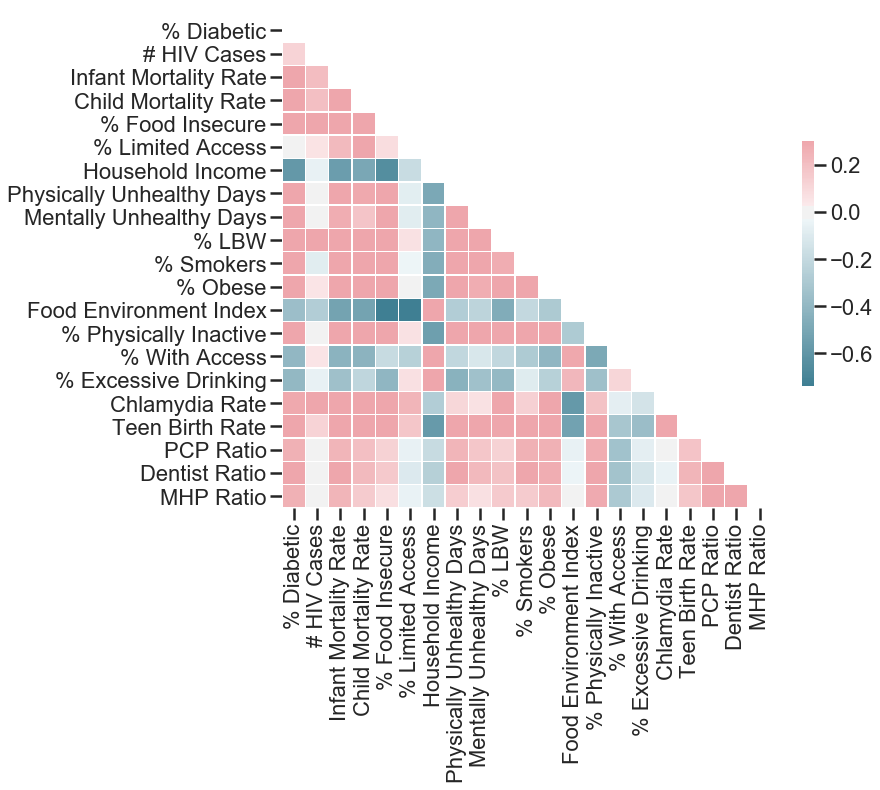

In [80]:
corr = df2.corr()
# Set up the matplotlib figure
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## From above it can be easily seen the negative correlation between household income and %diabetic(Very Strong close to -0.75), infant and child mortality rate(mildly between -0.25 and -0.5), food insecure( Strong between -0.5 and -0.75)
## Also household income is negatively correlated with physically Unhealthy days, Mentally unhealthy days, %LBW, %Smokers, %Obese and %Physically Inactive, %Teen Birth Rate and Chlamydia Rate.
## Household Income is only positively correalted( upto 0.25 correlation with %excessive drinking, % With Access and food environment access)